In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import spacy
nlp = spacy.load('ja_ginza')

In [3]:
from parse_5w1h import parse_5w1h
#テストファイル読み込み&下処理
path = "/Users/shota/Documents/itac/test_summary1.txt"
with open(path) as f:
    text = f.read()
text = text.replace('\n','')
print(text)
doc = nlp(text)

OK えっとー聞こえる。はい聞こえます。AI専用のホームページの話があったじゃん。はい。あれさあ尾崎の方でもってもらいたいの。承知しました。多分出来上がって石井さんから入れてもらってるんだけどあれおすすめらんないかな。承知しました。請求とかが今。さっさとホームページ出してほしいんじゃないのページを公開をちょっとあるお酒持ってもらっていい。色々あるから大変だったらちょっと俺に言って。承知しました。塩釜もあるしアイタムズのさっき言ったようにちょっと持ってるじゃん。じゃあITDは伊藤にさあ引き継いでいいから。承知しました。ITD伊藤に引き継いだ後でもいいんだけどでいいから AIのホームページのやつ入ってほしいからだからアイタムズ今月、5月も少しあるのかな、塩釜メインでそういう感じでいい、ちょっとお願いして。承知しました。一点だけですね、ご報告したいことがありまして。どこか明日の10時まであの日本テクト条件で作業が厳しいということを伺ったんですね。なのでもう人を入れるしかないと考えております。なるほどね。はい。日本テクトってそんな忙しいんだ。IBMのもやってるからね。なるほど。中島さんもほぼ同じ状況のようです。 かといって誰入れる。でもそうですね。　JAVAで岡島さん作ってんでしょ。言語ちょっと確認して。PHPです。で作ってるって。今じゃあできるけど忙しいから。PHPだったらでもまだ見つかるね。ちょっと俺じゃあ当たるわ。 もう一つがですねswiftで万歩計アプリってかかるれている。あっちはとさんできる。ようさん監修の元とさんって感じかな。PHPが尾崎の動きの方が好きでいいと思うんだよ。最もマルチプラットフォームだと望ましいんですよ。あーそうだな。一旦もういいよ。りょうさん空くまでIOSでとさんやってもらって、 Android の対応も最悪 Android で出てくるけど後でフラットにする。ちょっとら当たる。あのグループで今から投げるからちょっと待ってここで。今投げた。優先順位としては塩釜一番なのは変わりないから尾崎は2番目がアイタイムズで、ITD の件は3番目。ITDのやつが終わってからでいい、AIのホームページは。忘れないでね。早く会いたいですね先週だっけ石井さんから言われてるやつあごめんちょっとそれはそうだな


In [4]:
import networkx as nx

def increment_edge (graph, node0, node1):
    print("link {} {}".format(node0, node1))
    
    if graph.has_edge(node0, node1):
        graph[node0][node1]["weight"] += 1.0
    else:
        graph.add_edge(node0, node1, weight=1.0)

In [5]:
POS_KEPT = ["ADJ", "NOUN", "PROPN", "VERB"]

def link_sentence (doc, sent, lemma_graph, seen_lemma):
    visited_tokens = []
    visited_nodes = []

    for i in range(sent.start, sent.end):
        token = doc[i]

        if token.pos_ in POS_KEPT:
            key = (token.lemma_, token.pos_)

            if key not in seen_lemma:
                seen_lemma[key] = set([token.i])
            else:
                seen_lemma[key].add(token.i)

            node_id = list(seen_lemma.keys()).index(key)

            if not node_id in lemma_graph:
                lemma_graph.add_node(node_id)

            print("visit {} {}".format(visited_tokens, visited_nodes))
            print("range {}".format(list(range(len(visited_tokens) - 1, -1, -1))))
            
            for prev_token in range(len(visited_tokens) - 1, -1, -1):
                print("prev_tok {} {}".format(prev_token, (token.i - visited_tokens[prev_token])))
                
                if (token.i - visited_tokens[prev_token]) <= 3:
                    increment_edge(lemma_graph, node_id, visited_nodes[prev_token])
                else:
                    break

            print(" -- {} {} {} {} {} {}".format(token.i, token.text, token.lemma_, token.pos_, visited_tokens, visited_nodes))

            visited_tokens.append(token.i)
            visited_nodes.append(node_id)

In [6]:
lemma_graph = nx.Graph()
seen_lemma = {}

for sent in doc.sents:
    link_sentence(doc, sent, lemma_graph, seen_lemma)
    #break # only test one sentence

print(seen_lemma)

visit [] []
range []
 -- 0 OK OK NOUN [] []
visit [0] [0]
range [0]
prev_tok 0 2
link 1 0
 -- 2 聞こえる 聞こえる VERB [0] [0]
visit [] []
range []
 -- 5 聞こえ 聞こえる VERB [] []
visit [] []
range []
 -- 8 AI AI NOUN [] []
visit [8] [2]
range [0]
prev_tok 0 1
link 3 2
 -- 9 専用 専用 NOUN [8] [2]
visit [8, 9] [2, 3]
range [1, 0]
prev_tok 1 2
link 4 3
prev_tok 0 3
link 4 2
 -- 11 ホームページ ホームページ NOUN [8, 9] [2, 3]
visit [8, 9, 11] [2, 3, 4]
range [2, 1, 0]
prev_tok 2 2
link 5 4
prev_tok 1 4
 -- 13 話 話 NOUN [8, 9, 11] [2, 3, 4]
visit [8, 9, 11, 13] [2, 3, 4, 5]
range [3, 2, 1, 0]
prev_tok 3 2
link 6 5
prev_tok 2 4
 -- 15 あっ 有る VERB [8, 9, 11, 13] [2, 3, 4, 5]
visit [] []
range []
 -- 21 あれ あれ VERB [] []
visit [21] [7]
range [0]
prev_tok 0 2
link 8 7
 -- 23 尾崎 尾崎 PROPN [21] [7]
visit [21, 23] [7, 8]
range [1, 0]
prev_tok 1 2
link 9 8
prev_tok 0 4
 -- 25 方 方 NOUN [21, 23] [7, 8]
visit [21, 23, 25] [7, 8, 9]
range [2, 1, 0]
prev_tok 2 2
link 10 9
prev_tok 1 4
 -- 27 もっ 持つ VERB [21, 23, 25] [7, 8, 9]
visit [] 

In [7]:
labels = {}
keys = list(seen_lemma.keys())

for i in range(len(seen_lemma)):
    labels[i] = keys[i][0].lower()

labels


{0: 'ok',
 1: '聞こえる',
 2: 'ai',
 3: '専用',
 4: 'ホームページ',
 5: '話',
 6: '有る',
 7: 'あれ',
 8: '尾崎',
 9: '方',
 10: '持つ',
 11: '承知',
 12: '出来上がる',
 13: '石井',
 14: 'さん',
 15: '入れる',
 16: '御',
 17: 'すすめる',
 18: '請求',
 19: '今',
 20: '出す',
 21: 'ページ',
 22: '公開',
 23: '酒',
 24: '良い',
 25: '大変',
 26: '言う',
 27: '塩竈',
 28: 'アイタムズ',
 29: 'itd',
 30: '伊藤',
 31: '引き継ぐ',
 32: '後',
 33: '奴',
 34: '入る',
 35: '月',
 36: '塩釜',
 37: 'メイン',
 38: '感じ',
 39: '願う',
 40: '点',
 41: '報告',
 42: 'こと',
 43: '明日',
 44: '時',
 45: '日本',
 46: 'テクト',
 47: '条件',
 48: '作業',
 49: '厳しい',
 50: '伺う',
 51: '人',
 52: '考える',
 53: '忙しい',
 54: 'ibm',
 55: '遣る',
 56: '中島',
 57: '同じ',
 58: '状況',
 59: '様',
 60: 'java',
 61: '岡島',
 62: '作る',
 63: '言語',
 64: '確認',
 65: 'php',
 66: '出来る',
 67: '見付かる',
 68: '当たる',
 69: 'つ',
 70: 'swift',
 71: '万歩',
 72: '計',
 73: 'アプリ',
 74: '掛かる',
 75: 'よう',
 76: '監修',
 77: '元',
 78: '動き',
 79: '好き',
 80: '思う',
 81: 'マルチ',
 82: 'プラットフォーム',
 83: '望ましい',
 84: 'りょう',
 85: '空く',
 86: 'ios',
 87: 'アンドロイド',
 88: 

In [8]:
import matplotlib as mpl
print(mpl.rcParams['font.family'])

['sans-serif']


{0: Text(0.5414309866769319, 0.6067658104471112, 'ok'),
 1: Text(0.5080736021053813, 0.558107998294572, '聞こえる'),
 2: Text(-0.2795153270054009, -0.1222778314596347, 'ai'),
 3: Text(-0.24621851609954146, -0.1498847621795895, '専用'),
 4: Text(-0.2157338747574942, -0.08797351849341617, 'ホームページ'),
 5: Text(-0.16079067346114334, -0.023900731400783637, '話'),
 6: Text(-0.09144441375778616, 0.045464102829846066, '有る'),
 7: Text(-0.5284980071849956, 0.11129483631817688, 'あれ'),
 8: Text(-0.45646550076664577, 0.11788250234704824, '尾崎'),
 9: Text(-0.34097763238650997, 0.04909515263411703, '方'),
 10: Text(-0.1748942103301663, 0.019882213456874045, '持つ'),
 11: Text(0.8980412794103885, 0.4368979890427658, '承知'),
 12: Text(0.20507203611490069, -0.1272048300259762, '出来上がる'),
 13: Text(0.18971848222807738, -0.08905688421171173, '石井'),
 14: Text(0.2589019665562918, -0.09635284369778992, 'さん'),
 15: Text(0.18440588255113557, -0.057669644626751594, '入れる'),
 16: Text(-0.044087888304528054, -0.0213268297516922

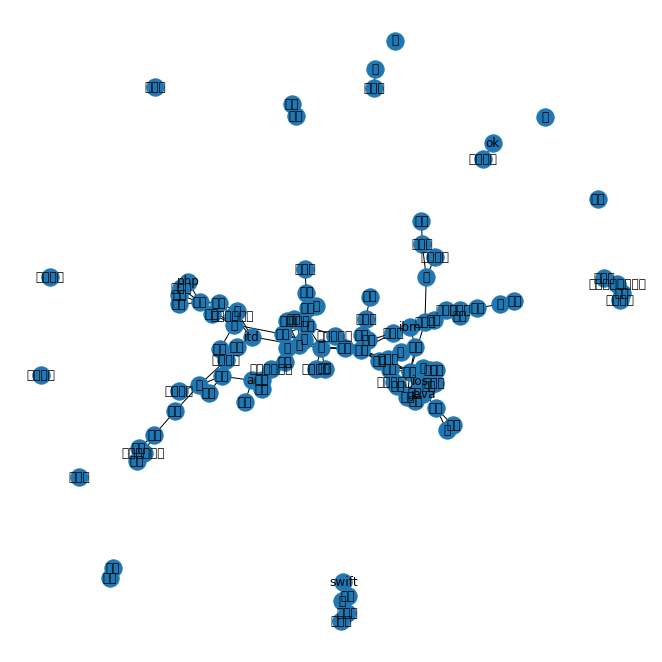

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(lemma_graph)

nx.draw(lemma_graph, pos=pos, with_labels=False, font_weight="bold")
nx.draw_networkx_labels(lemma_graph, pos, labels)

In [11]:
ranks = nx.pagerank(lemma_graph)
ranks

{0: 0.009689922480620155,
 1: 0.009689922480620155,
 2: 0.017437326137767717,
 3: 0.006368392572387582,
 4: 0.023008251014265558,
 5: 0.006658459187223049,
 6: 0.029226478070132535,
 7: 0.004347388249176928,
 8: 0.023831927119788515,
 9: 0.012828376584842687,
 10: 0.012188248910969736,
 11: 0.0014534883720930235,
 12: 0.0060127354572295025,
 13: 0.01637038746691872,
 14: 0.05534421190891474,
 15: 0.011554439768759982,
 16: 0.021308961873982585,
 17: 0.0040409955968624045,
 18: 0.0014534883720930235,
 19: 0.01297114423609712,
 20: 0.003898127121527273,
 21: 0.00507918387440208,
 22: 0.008531247090363504,
 23: 0.009391328836946659,
 24: 0.015342056992595013,
 25: 0.004213820437788799,
 26: 0.03394131450475488,
 27: 0.004213820437788799,
 28: 0.006433060219674563,
 29: 0.016584333074044333,
 30: 0.0108294697063255,
 31: 0.013756216183237652,
 32: 0.01290641372145666,
 33: 0.018018808011087593,
 34: 0.00645078118045385,
 35: 0.004213820437788799,
 36: 0.004719181473505785,
 37: 0.007684035

In [12]:
imp_list = []
for node_id, rank in sorted(ranks.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(node_id, rank, labels[node_id])
    imp_list.append(labels[node_id])

14 0.05534421190891474 さん
26 0.03394131450475488 言う
6 0.029226478070132535 有る
8 0.023831927119788515 尾崎
4 0.023008251014265558 ホームページ
16 0.021308961873982585 御
33 0.018018808011087593 奴
2 0.017437326137767717 ai
29 0.016584333074044333 itd
13 0.01637038746691872 石井


In [13]:
imp_list

['さん', '言う', '有る', '尾崎', 'ホームページ', '御', '奴', 'ai', 'itd', '石井']